DATA DOWNLOAD: https://www.cs.toronto.edu/~kriz/cifar.html  
This is a simple model for CIFAR10 and we can find the performance is not good.  
______

In [1]:
import cifar10
cifar10.maybe_download_and_extract()

Data has apparently already been downloaded and unpacked.


In [2]:
class_names = cifar10.load_class_names()
print(class_names)

Loading data: data/CIFAR-10/cifar-10-batches-py/batches.meta
['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


In [3]:
images_train, cls_train, labels_train = cifar10.load_training_data()
print(images_train.shape)
print(cls_train.shape)
print(labels_train.shape)

Loading data: data/CIFAR-10/cifar-10-batches-py/data_batch_1
Loading data: data/CIFAR-10/cifar-10-batches-py/data_batch_2
Loading data: data/CIFAR-10/cifar-10-batches-py/data_batch_3
Loading data: data/CIFAR-10/cifar-10-batches-py/data_batch_4
Loading data: data/CIFAR-10/cifar-10-batches-py/data_batch_5
(50000, 32, 32, 3)
(50000,)
(50000, 10)


In [4]:
images_test, cls_test, labels_test = cifar10.load_test_data()
print(images_test.shape)
print(cls_test.shape)
print(labels_test.shape)

Loading data: data/CIFAR-10/cifar-10-batches-py/test_batch
(10000, 32, 32, 3)
(10000,)
(10000, 10)


In [5]:
print("Size of:")
print("Training Set:\t\t{}".format(len(images_train)))
print("Test Set:\t\t{}".format(len(images_test)))

Size of:
Training Set:		50000
Test Set:		10000


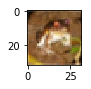

frog


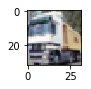

truck


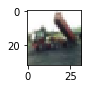

truck


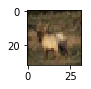

deer


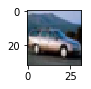

automobile


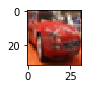

automobile


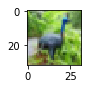

bird


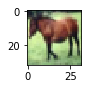

horse


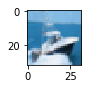

ship


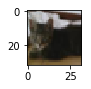

cat


In [6]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline
for i in range(10):
    img = images_train[i]
    label = labels_train[i]
    
    plt.figure(figsize=(1,1))
    plt.imshow(img)
    plt.show()
    
    cls = np.argmax(label)
    class_name = class_names[cls]
    print(class_name)

In [7]:
import tensorflow as tf

X = tf.placeholder(tf.float32, [None, 32*32*3])
y_ = tf.placeholder(tf.float32, [None, 10])

batch_size = 400
epochs = 10000
lr = 0.01
n_hidden1 = 600
n_hidden2 = 600

W1 = tf.Variable(tf.random_normal([32*32*3,n_hidden1], stddev = 0.1))
b1 = tf.Variable(tf.zeros([n_hidden1]))
h1 = tf.matmul(X,W1) + b1
h1 = tf.nn.relu(h1)
                 
W2 = tf.Variable(tf.random_normal([n_hidden1, n_hidden2], stddev = 0.1))
b2 = tf.Variable(tf.zeros([n_hidden2]))
h2 = tf.matmul(h1, W2) + b2
h2 = tf.nn.relu(h2)

W_out = tf.Variable(tf.random_normal([n_hidden2, 10], stddev = 0.1))
b_out = tf.Variable(tf.zeros([10]))
y_out = tf.matmul(h2, W_out) + b_out

cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(labels=y_, logits=y_out, name="loss"))
optimizer = tf.train.AdamOptimizer()
train_step = optimizer.minimize(cross_entropy)

correct_prediction = tf.equal(tf.argmax(y_, 1), tf.argmax(y_out, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

/Users/quansun/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [8]:
def random_batch(images_train, labels_train, batch_size):
    num_images = len(images_train)
    idx = np.random.choice(num_images, size = batch_size, replace = False)
    x_batch = images_train[idx]
    y_batch = labels_train[idx]
    return x_batch, y_batch

In [9]:
sess = tf.InteractiveSession()
tf.global_variables_initializer().run()

images_train = images_train.reshape([50000, -1])
images_test = images_test.reshape([10000, -1])

for iter in range(epochs):
    x_batch, y_batch = random_batch(images_train, labels_train, batch_size)
    sess.run(train_step, feed_dict= {X:x_batch, y_:y_batch})
    if iter % 100 == 0:
        train_loss = sess.run(cross_entropy, feed_dict={X:x_batch, y_:y_batch})
        train_accuracy = sess.run(accuracy, feed_dict={X:x_batch, y_:y_batch})
        
        x_test = images_test
        y_test = labels_test
        test_accuracy = sess.run(accuracy, feed_dict={X:x_test, y_:y_test})
        
        print("iter %d training loss %f training accuracy %f test accuracy %f" % (iter, train_loss, train_accuracy, test_accuracy))

iter 0 training loss 21.188705 training accuracy 0.105000 test accuracy 0.105700
iter 100 training loss 1.818837 training accuracy 0.367500 test accuracy 0.328200
iter 200 training loss 1.808087 training accuracy 0.360000 test accuracy 0.380100
iter 300 training loss 1.774398 training accuracy 0.392500 test accuracy 0.399500
iter 400 training loss 1.698684 training accuracy 0.405000 test accuracy 0.415700
iter 500 training loss 1.640266 training accuracy 0.415000 test accuracy 0.419500
iter 600 training loss 1.534212 training accuracy 0.475000 test accuracy 0.435400
iter 700 training loss 1.552337 training accuracy 0.437500 test accuracy 0.438700
iter 800 training loss 1.443332 training accuracy 0.480000 test accuracy 0.437700
iter 900 training loss 1.319960 training accuracy 0.527500 test accuracy 0.459700
iter 1000 training loss 1.354273 training accuracy 0.505000 test accuracy 0.467400
iter 1100 training loss 1.259770 training accuracy 0.547500 test accuracy 0.473000
iter 1200 train

iter 9900 training loss 0.219656 training accuracy 0.925000 test accuracy 0.510200


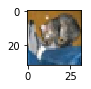

Ground Truth is cat
Model prediction is cat


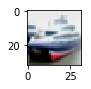

Ground Truth is ship
Model prediction is ship


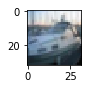

Ground Truth is ship
Model prediction is airplane


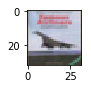

Ground Truth is airplane
Model prediction is ship


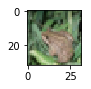

Ground Truth is frog
Model prediction is deer


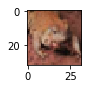

Ground Truth is frog
Model prediction is frog


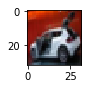

Ground Truth is automobile
Model prediction is automobile


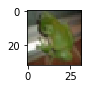

Ground Truth is frog
Model prediction is frog


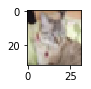

Ground Truth is cat
Model prediction is deer


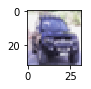

Ground Truth is automobile
Model prediction is automobile


In [10]:
images_train = images_train.reshape([50000,32,32,3])
images_test = images_test.reshape([10000,32,32,3])

for i in range(10):
    img = images_test[i]
    label = labels_test[i]
    
    plt.figure(figsize=(1,1))
    plt.imshow(img)
    plt.show()
    cls = np.argmax(label)
    class_name = class_names[cls]
    print("Ground Truth is", class_name)
    
    pred_label = sess.run(y_out, feed_dict={X:img.reshape([1,-1])})
    pred_cls = np.argmax(pred_label)
    pred_cls_name = class_names[pred_cls]
    print("Model prediction is", pred_cls_name)
    